### Implied weighting theory

__Implied weighting (IW)__ describes a group of methods used in phylogenetic analysis to assign the greatest importance to characters that are most likely to be homologous.

__Farris (1969). A Successive Approximations Approach to Character Weighting__:

`"Let the pool of your trees tell how reliable characters are."`

Successive approximations weighting (SAW) with a pool of trees - the weights implied by the most parsimonious tree(s) for one set of weights are used in a reanalysis of the data.
It is an iterative procedure and is repeated until a stable solution is achieved. The starting point - equally weighted trees.

__Problem__: sensitivity of the final results to the initial weights of trees.

__Suggested solution__: stopping point with __self-consistency rule__: "A tree which is the shortest under the weights it implies is a tree which resolves character conflict in favour of the characters which, on the tree itself, have less homoplasy - __self-consistent__". 

The solution is far from perfect. Some sels-consistent trees may be more "reasonable" than others. The output sensivity because of the initial weight still exists. Self-consistency is not sufficient condition.


__P. A. Goloboff (1993). Estimating charachter weights during tree search__:


The most parsimonious cladogram is the hypothesis with greatest explanatory power, `given the weights that the characters deserve` (Farris, 1983).


* The trees which imply higher weights are to be preferred.

* The weight of a character - a function of its fit of a tree.

* The fit for a character - function of its homoplasy.

* The total fit of a tree - the sum of the fits of the characters. 

* Total fit - quantity to be maximized.

Among all possible trees, the tree with highest total fit would be chosen. For a large number of taxa some computational strategy is needed, for example - __branch swapping__.

Functions of homoplasy $F(h)$:

1. $F_{linear}(h)$: shortest tree - the tree with the highest fit.

] $s$ - number of weighting steps, $k$-constant, $f_i$ - the fit for a character $i$, then:

$$f_i=k-s_i$$

The difference in fit for a character $i$ having $s_{i,1}$ for one tree and $s_{i,2}$ for another:

$$d_{i,(1,2)}=f_{i,1}-f_{i,2}=s_{i,2}-s_{i,1}$$

Example:

$s_{A, T_X}=1$\
$s_{A, T_Y}=2$\
$d_{A, (T_X, T_Y)}=1$

$s_{B, T_X}=15$\
$s_{B, T_Y}=14$\
$d_{B,(T_X, T_Y)}=1$

Conclusions:

* The same $\Delta$ in number of steps - the same $\Delta$ in fit, * regardless of absolute numbers of homoplasy.
* If characters had been assigned different prior weights, this leads to different slopes of a linear function.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Toy example for linear fit function of the homoplasy

def lin_func(k, steps):
    return k-steps

def plot_deltas(step1, step2, func, k, c, axis, char='char', trees=['X', 'Y']):
    plt.plot(range(steps), fit_output)
    for s, t in zip([step1, step2], trees):
        axis.vlines([s], 0, func(k, s),
                   linestyles='--', alpha=0.5, colors=c, 
                    label=f'{char}: steps on a tree {t}: {s}')
        axis.hlines([func(k, s)], 0, s, 
                   linestyles='--', alpha=0.5, colors=c)
    delta = func(k, step1)-func(k, step2)
    axis.text(0, 1.05*func(k, s), '$|\Delta|=%.3f$' % delta)

k=20
steps = 20
prior_weights = [0.2, 0.3, 0.5, 0.8, 0.9]
fit_output = np.array([lin_func(k, s) for s in range(steps)])

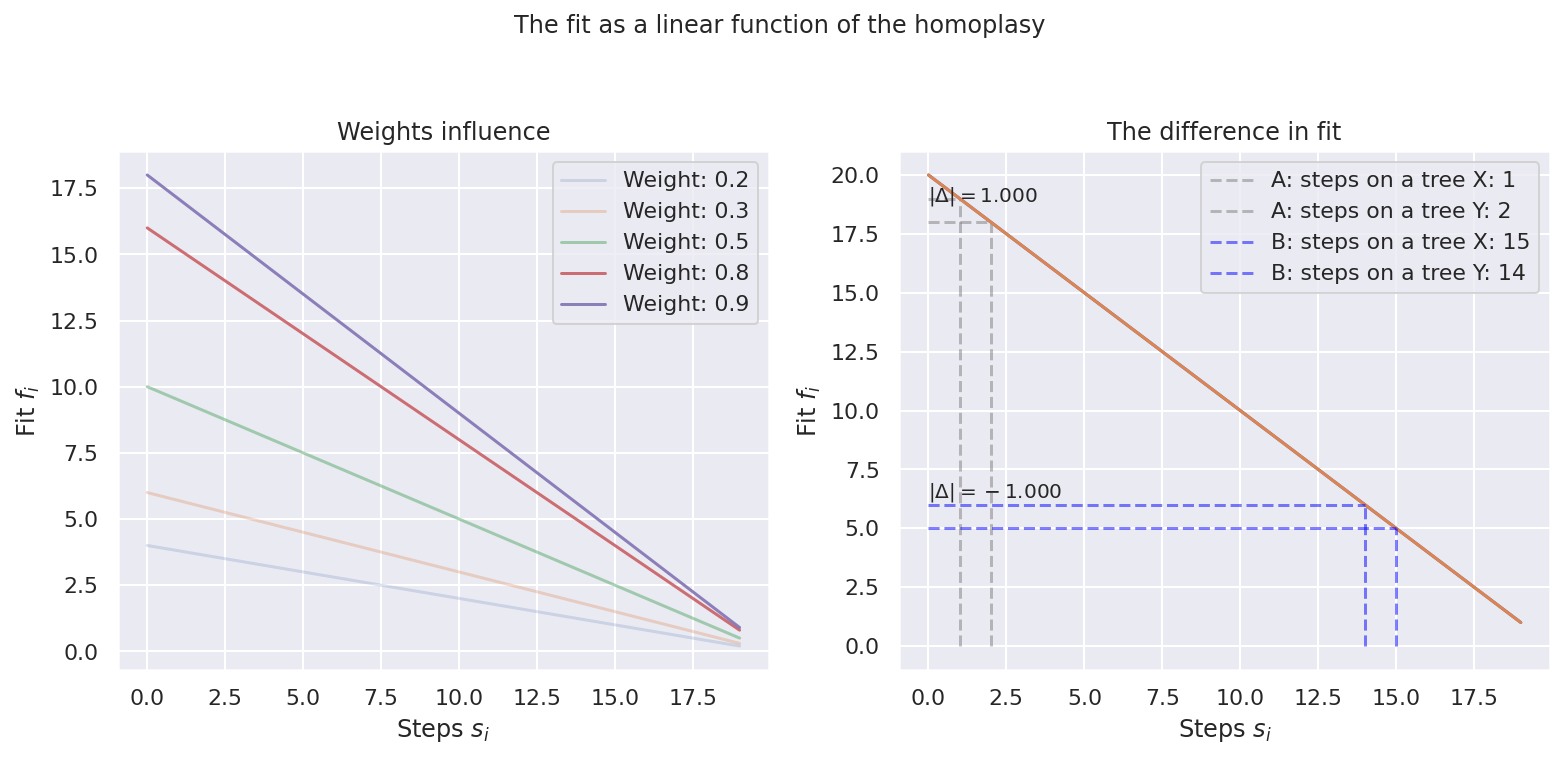

In [3]:
# Init subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,5))

# Plot deltas
plot_deltas(1, 2, lin_func, k, 'gray', axs[1], 'A')
plot_deltas(15, 14, lin_func, k, 'blue', axs[1], 'B')

# Changing slope with prior weights
for w in prior_weights:
    axs[0].plot(range(steps), w*fit_output, 
                label=f'Weight: {w}', alpha=w)

for ax in axs:
    ax.set_xlabel('Steps $s_i$')
    ax.set_ylabel('Fit $f_i$')

axs[0].set_title('Weights influence')
axs[1].set_title('The difference in fit')
    
axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")

plt.suptitle('The fit as a linear function of the homoplasy', y=1.05)

plt.tight_layout()
plt.show()

To get a measure of parsimony that can be sensitive to differences in the homoplasy that characters have on the trees being compared (characters A, B and trees X, Y above) we should consider concave and convex fit functions of the homoplasy.

2. $F_{concave}(h)$(concave up) - consistency index $c$ (Kluge, Farris, 1969)

Original index of consistency:

] $R-$ the difference between numerically largest and numerically smallest states of a character $i$, $R=\sum_i r(i)$, $L-$ length of a tree, then:

$$c=\frac{R}{L}, c \in [0,1]$$

So, the lesser $c$, the more convergency for a tree and vice versa.

Also: 
$$c=\frac{R}{R+S},$$
where $S$ or $s_{extra,i}$ is "extra length," is some weighted continuous analog of "number of extra steps."

Then if $c-$ the function of the homoplasy, then the difference in fit for a character $i$ having $s_{i,1}$ for one tree and $s_{i,2}$ for another:

$$d_{i,(1,2)}=\frac{R}{R+s_{extra,i,1}}-\frac{R}{R+s_{extra,i,2}}=R\frac{(R+s_{extra,i,2})-(R+s_{extra,i,1})}{(R+s_{extra,i,1})(R+s_{extra,i,2})}=$$

$$R\frac{s_{i,2} - s_{i,1}}{s_{i,1}s_{i,2}} \underset{\sim}{\propto} \frac{s_{i,2} - s_{i,1}}{s_{i,1}s_{i,2}},$$


where $\underset{\sim}{\propto}$-approximately proportional.


In updated definition (Farris, 1989), $R-m$, $L-s$, 

where:

$s$ - the amount of change in the character (for an integral character, number of steps) required parsimoniously by the considered tree,

$m$ - the minimum amount ofchange that the character may show on any tree:

$$c=\frac{m}{s},$$ then:

$$d_{i,(1,2)}=m(\frac{1}{s_{i,1}} - \frac{1}{s_{i,2}})=m(\frac{s_{i,2}-s_{i,1}}{s_{i,1}s_{i,2}}) \underset{\sim}{\propto} \frac{s_{i,2} - s_{i,1}}{s_{i,1}s_{i,2}}$$

In [4]:
def concave_func(k, steps):
    return k/(k+steps)

k=1
steps = 20
prior_weights = [0.2, 0.3, 0.5, 0.8, 0.9]
fit_output = np.array([concave_func(k, s) for s in range(steps)])

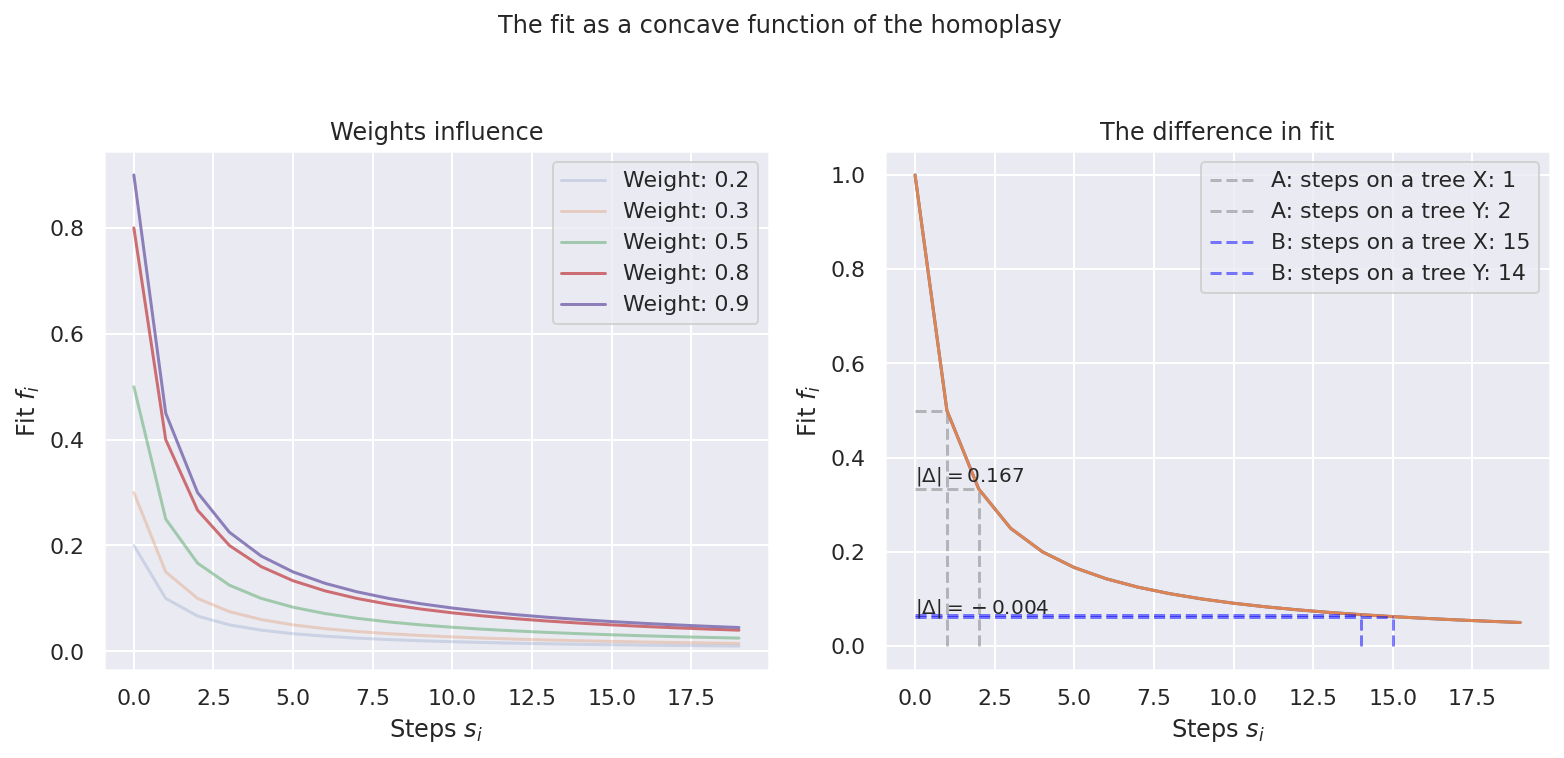

In [5]:
# Init subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,5))

# Plot deltas
plot_deltas(1, 2, concave_func, k, 'gray', axs[1], 'A')
plot_deltas(15, 14, concave_func, k, 'blue', axs[1], 'B')
plt.title('The fit as a concave function of the homoplasy')

# Changing prior weights
for w in prior_weights:
    axs[0].plot(range(steps), w*fit_output, 
                label=f'Weight: {w}', alpha=w)

for ax in axs:
    ax.set_xlabel('Steps $s_i$')
    ax.set_ylabel('Fit $f_i$')
    
axs[0].set_title('Weights influence')
axs[1].set_title('The difference in fit')
    
axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")

plt.suptitle('The fit as a concave function of the homoplasy', y=1.05)

plt.tight_layout()
plt.show()

In the concave setting, it is obvious that the same differences in number of steps are less important if occuring between trees with more steps.

For the example above tree X represents a decrease in fit, over tree Y of ~0.004 for character B,  and an increase of 0.167 for character A.

Choosing tree X - lossing less than gain.

Conclusions:

* The fittest tree - the tree with maximum average $c$.


* The fittest involves such a pairwise comparison with all the other trees, and, thus, will be preferable to all of them.


* The fittest tree is the one which, in face of character conflict, implies fewer steps for those characters which fit the tree better.


* The characters will be weighted differently for different pairwise comparisons.

For $F_{concave}(h)=c$,

the fittest tree is the one that maximizes:
$$\sum c_i=\sum(\frac{m_i}{s_i}),$$

the shortest tree is the one that maximizes:
$$C=\frac{\sum m_i}{\sum s_i}$$


3. $F_{convex}(h)$ (concave down)

Irrationality: the same difference in number of steps is more important when there is more homoplasy.


Appropriate choice - $F_{concave}(h)$(concave up).

---

#### Fitting functions

The trees with max fit can be seen as the trees which imply the characters to have on average  as high weight as possible.

Homoplastic characters should be strongly down-weighted (Farris, 1969)

(Farris, 1989) suggested a weighting function - __the unit rescaled consistency index $rc$__, stronger than $c$, with lower bound 0:

$$rc=r \times c$$

Drawbacks:

* Choosing the tree with highest $\sum r c_i$ would make less influentiaal not only characters with more homoplasy, but also characters with more informative variation.


* If we use $rc$ to get prior weights, for similar number of steps, characters with more informative variation would be given higher weights.

At the same time, choosing the tree with the highest $\sum c_i$ would make multistate characters less influential, i.e. for similar number of extra steps, the binary character would be more influential than the multistate. 

To eliminate the influence of additional states, the modified $c$ was proposed:

$$f_i = \frac{1}{s_i+1-m_i}$$

It can also be modified to be less steep with concavity parameter $k$:

$$f_i = \frac{k+1}{s_i + k + 1 -m_i}$$

Accordingly, $k$ can be considered as a regularization parameter. The higher $k$ is - the less penalty to characters with homoplasy.

In [6]:
def c_modified(k, m, s):
    return (k+1)/(s+k+1-m)


def make_k_plots(k_list, m , steps, ax):
    for k in k_list:
        ax.plot(range(1, steps+1), 
                [c_modified(k, m, s) for s in range(1, steps+1)], 
                label=f'k: {k}', alpha=0.7)
    ax.set_xlabel('Steps $s_i$')
    ax.set_ylabel('Fit $f_i$')

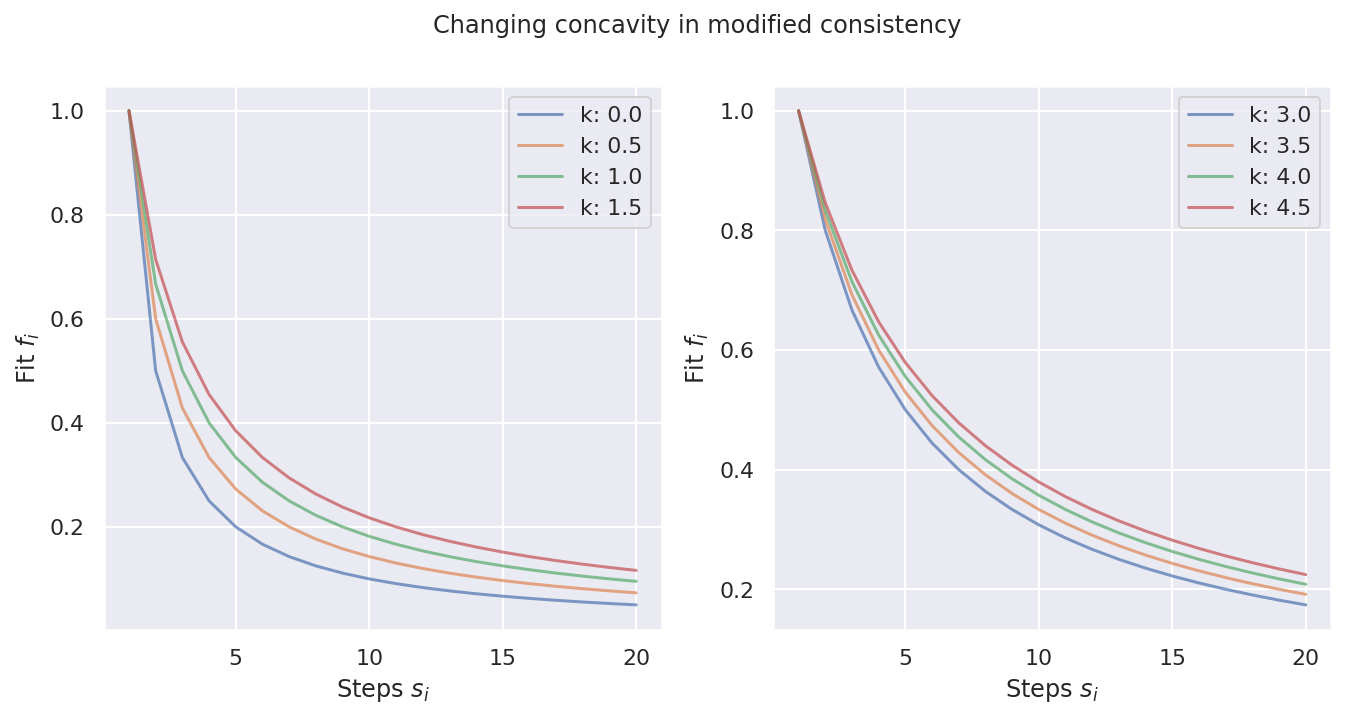

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,5))

steps = 20
m = 1
k_list = [0.5*x for x in range(4)]
make_k_plots(k_list, m, steps, axs[0])

k_list = [0.5*x for x in range(6, 10)]
make_k_plots(k_list, m, steps, axs[1])   
    
axs[0].legend()
axs[1].legend()

plt.suptitle('Changing concavity in modified consistency')
plt.show()

Thus, increasing the concavity parameter $k$ brings the fit function $f_i$ closer to linear type and vice versa.